# Assignment 1
Submitted by : Tan Siew Ling p7401864

## Titanic
- For this problem, use only 1 target output variable (Survived)
- Prepare the data and perform necessary feature engineering
- Create **_at least two models_** 
- Evaluate the models and pick the best candidate
- Form some conclusions

# ***Prediction task : To predict what type of passengers are likely to survive the Titanic tragedy***

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc).

# Target Output Variable = Passenger Survived or Not Survived

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# shift-tab to show docstring: highlight and shift-tab: format
#?zip()
#%lsmagic
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing¶

In [12]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib
import seaborn
import platform

message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Matplotlib version={}".format(matplotlib.__version__))
print("Seaborn version={}".format(seaborn.__version__))
print("Python version={}".format(platform.python_version()))

************************
        Versions        
************************
Scikit-learn version=0.22.2.post1
Numpy version=1.19.5
Pandas version=1.1.5
Matplotlib version=3.2.2
Seaborn version=0.11.1
Python version=3.7.10


In [13]:
from sklearn import datasets 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
titanic = pd.read_csv("/content/drive/MyDrive/sp/sem2_apml/assignments/assignment1/train.csv")
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [15]:
titanictest = pd.read_csv("/content/drive/MyDrive/sp/sem2_apml/assignments/assignment1/test.csv")
titanictest.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Exploratory Data Analysis

In [16]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
# List out all variables with nulls/missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


1. There are are 177 passengers with no age
2. There are 687 passengers without Cabin number (Likely as the Cheapest class passengers did not have a cabin)
3. There are 2 Passengers with no Embarked information




# **List of Features selected**
• How do you represent your data as features?


> (a) Drop columns not selected as features - PassengerId, Name (No Correlation to Survival of Passenger)





In [19]:
# Get list of numeric and nonnumeric variables
numvars = list(titanic.columns[titanic.dtypes != "object"])
nonnumvars = list(titanic.columns[titanic.dtypes == "object"])
print(numvars)
print(nonnumvars)

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [20]:
# Do some further exploration on list to get list of features used
numvars.remove('PassengerId')
numvars.remove('Survived')
numfeats = numvars
print(numfeats)

#nonnumvars.remove('Cabin')
nonnumvars.remove('Name')
nonnumvars.remove('Ticket')
nonnumfeats = nonnumvars
print(nonnumfeats)

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
['Sex', 'Cabin', 'Embarked']


**EPA: Age of passengers mainly between 20 to 40 years old**

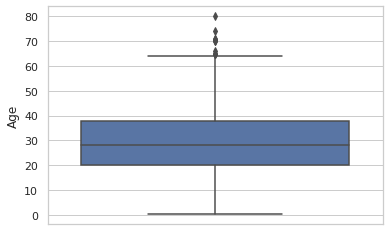

In [13]:
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(y=titanic["Age"])

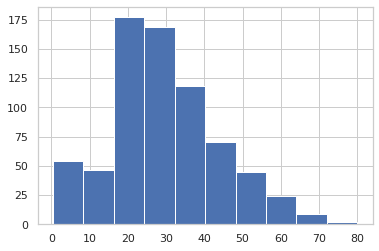

In [ ]:
titanic['Age'].hist(bins=10)


**EPA: Most passengers paid the lowest fare (PClass3)**

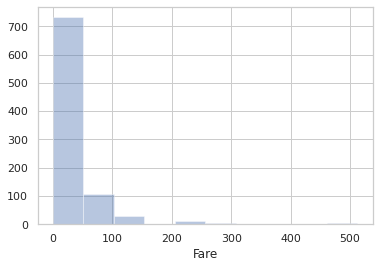

In [ ]:
sns.set(style="whitegrid")
sns.distplot(titanic["Fare"], bins=10, kde=False, rug=False)
plt.show()

**EPA: Passengers of the lowest Class Fare (PClass3) are more likely not to survive. Possibly because they are located at the bottom of the ship. The tragedy striked during the daytime so passengers were most likely not in their cabin but for the PClass3 and the social status difference, PClass3 passengers are not allowed up on the deck to mingle with the other class passengers. So when the tragedy strike, they are mostly stuck at the bottom of the ship as the ship sank, making it difficult for them to make their way up to the deck and get on the lifeboats**

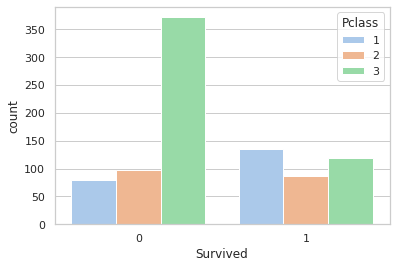

In [ ]:
sns.countplot(x="Survived", hue="Pclass", palette="pastel",data=titanic)
plt.show()

**EPA: PClass1 passengers were more likely to survive as they were mostly on the deck when the tragedy strike during the day. They paid a higher fare for PClass1 and is of a higher social class and hence are allowed on the deck.**

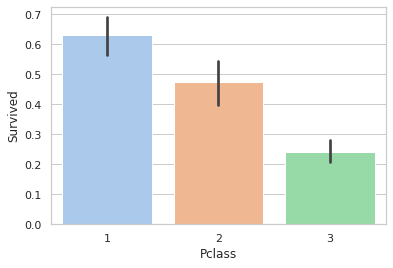

In [ ]:
sns.barplot(y="Survived", x="Pclass", palette="pastel",data=titanic)
plt.show()

**EPA: Most passengers embarked at Southampton (Titanic sailed out point)**

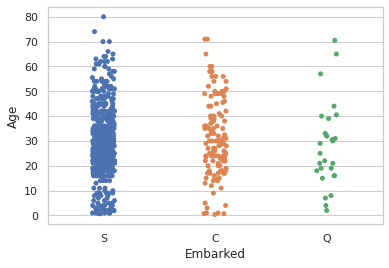

In [ ]:
sns.stripplot(x="Embarked", y="Age", data=titanic, jitter=True)
plt.show()

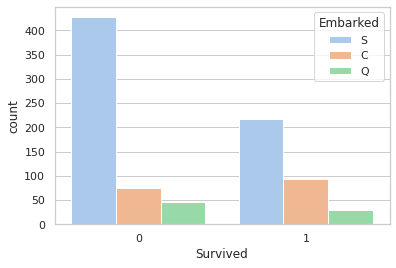

In [ ]:
sns.countplot(x="Survived", hue="Embarked", palette="pastel",data=titanic)
plt.show()

**EPA: Most passengers embarked at Southampton (Titanic sailed out point), hence passengers who survived or died were from Southamption**

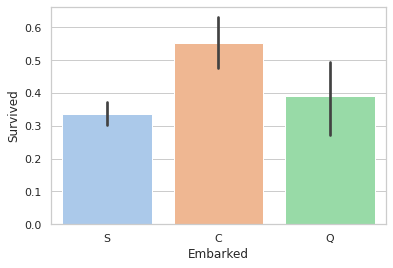

In [ ]:
sns.barplot(y="Survived", x="Embarked", palette="pastel",data=titanic)
plt.show()

# **Data Preparation**
## • Did you process the features in any way?

## > (a) Handle Missing Values for  features - Age, Cabin and Embarked

## > (b) Encode all the categorical features - Sex, Cabin, Embarked  to tranform non-numeric feature to numeric

## > (c) Drop columns not selected as features - PassengerId, Name (No Correlation to Survival of Passenger)

## > (d) Data Transformation : Use StandardScaler to transform data to a relatively normal distribution on the feature columns as most Learning Algorithms assumed a normal distributed dataset

## • Did you bring in any additional sources of data? No


# **## (a) Handle missing values**


# Fill missing Age with the mean age

> There are are 177 passengers with no age

Hence, we impude the missing value with the mean age


In [21]:
# Age has some missing values which needs to be filled
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
model_mean_age = titanic['Age'].mean()
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



# Replace Cabin Value with Yes (Have Cabin number) or No (Missing Cabin number)




> (1) #Cabin features is a alphanumeric value


> (2) There are 687 passengers without Cabin number (Likely as the Cheapest class passengers did not have a cabin)


Hence, we will convert the feature to a categorical value by replacing the Cabin value with No if missing and Yes if there is a cabin number



In [22]:
# We will replace the Cabin value with No if missing and Yes if there is a cabin number
titanic['Cabin'].fillna('No', inplace=True)
titanic['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
titanic.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,No,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,No,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,Yes,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,No,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,No,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,No,C



# Fill Missing Embarked value with the mode Embarked value (Embarked point of most passengers

There are 2 Passengers with no Embarked information

> impude the missing Embarked value with the mode which is S


> C = Cherbourg, Q = Queenstown, S = Southampton








In [23]:
# 2 missing values in the embarked
# use the mode to replace it
print(titanic['Embarked'].mode()[0])
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)
model_embarked_mode = titanic['Embarked'].mode()[0]
titanic.head(5)

S


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,No,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Yes,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,No,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Yes,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,No,S


# (c) Drop columns that are not features - PassengerId, Name

> No Correlation to Survival of Passenger





In [24]:
# Drop the PassengerId ana Name
titanic = titanic.drop(["PassengerId","Name","Ticket"],axis=1)
titanic.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,No,S
1,1,1,female,38.0,1,0,71.2833,Yes,C
2,1,3,female,26.0,0,0,7.9250,No,S
3,1,1,female,35.0,1,0,53.1000,Yes,S
4,0,3,male,35.0,0,0,8.0500,No,S


# (b) Encode all the categorical features - Sex, Cabin, Embarked to numerical values

> so that they can be processed by the learning algorithms




In [25]:
# Encode all the categorical variables
titanicdf = pd.get_dummies(titanic,columns=nonnumfeats)
titanicdf.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,1,0,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0,1,1,0,0


# Features are now all numeric

In [26]:
titanicdf.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Cabin_No        uint8
Cabin_Yes       uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [46]:
titanicdf.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.352413,0.647587,0.771044,0.228956,0.188552,0.086420,0.725028
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990,0.477990,0.420397,0.420397,0.391372,0.281141,0.446751
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Correlation of Features to Survived

*   Top 3 highest correlation feature to Survived are :
 Sex_female, Cabin_Yes, Fare


> (1) Female passengers were more likely to survive possibly due to social norms to let Females and the young to escape first so they are more likely to get on the lifeboats


> (2) Passengers With Cabin are more likely to survive as they were of higher social class so they are allowed to go to the deck. At the time of tragedy, it is daytime, so these Passengers with Cabin are likey to be on the deck, making it easier for them to reach the lifeboats first. The passengers with no cabin are not allowed to go to the deck because they were of a lower social class. So they were stuck in the bottom of the ship most of the time. So when the tragedy strike, it is difficult for them to make their way from the bottom of ship to the lifeboats


> (3) Fare: Passengers who paid more fare are likely the ones with cabin. This also they are of higher social class and they pay more fare so they are allowed to go to the deck which gave them faster access to the lifeboats when the tragedy striked. The low fare passengers had no cabin and cannot go to the deck because they are of a lower social class. 






In [27]:
# Since all values are numeric, do a correction and sort to determine
# the most important features relative to Survived
corr = titanicdf.corr()
corr.sort_values(["Survived"], ascending = False, inplace = True)
print(corr.Survived)

Survived      1.000000
Sex_female    0.543351
Cabin_Yes     0.316912
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
Embarked_Q    0.003650
SibSp        -0.035322
Age          -0.069809
Embarked_S   -0.149683
Cabin_No     -0.316912
Pclass       -0.338481
Sex_male     -0.543351
Name: Survived, dtype: float64


# **(d) Data Transformationn**
> Use StandardScaler to transform data to a relatively normal distribution on the feature columns as most machine learning model assume a normal distribution of data



In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = titanicdf.drop(["Survived"],axis=1).values

# transform data
X_scaled = scaler.fit_transform(X)
print(X_scaled)


[[ 0.82737724 -0.5924806   0.43279337 ... -0.48204268 -0.30756234
   0.61583843]
 [-1.56610693  0.63878901  0.43279337 ...  2.0745051  -0.30756234
  -1.62380254]
 [ 0.82737724 -0.2846632  -0.4745452  ... -0.48204268 -0.30756234
   0.61583843]
 ...
 [ 0.82737724  0.          0.43279337 ... -0.48204268 -0.30756234
   0.61583843]
 [-1.56610693 -0.2846632  -0.4745452  ...  2.0745051  -0.30756234
  -1.62380254]
 [ 0.82737724  0.17706291 -0.4745452  ... -0.48204268  3.25137334
  -1.62380254]]


# Train Model

## Split Data into Train and Test Sets (valuation sets)

In [29]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf.drop(["Survived"],axis=1).values

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

print(X_train)
print(y_train)

print(X_test)
print(y_test)

[[ 0.82737724 -0.20770885 -0.4745452  ... -0.48204268 -0.30756234
   0.61583843]
 [-1.56610693  2.17787603 -0.4745452  ...  2.0745051  -0.30756234
  -1.62380254]
 [ 0.82737724 -0.900298   -0.4745452  ... -0.48204268 -0.30756234
   0.61583843]
 ...
 [-0.36936484  1.87005862  0.43279337 ... -0.48204268 -0.30756234
   0.61583843]
 [ 0.82737724 -0.7463893   0.43279337 ... -0.48204268 -0.30756234
   0.61583843]
 [-0.36936484 -0.1307545   0.43279337 ...  2.0745051  -0.30756234
  -1.62380254]]
[1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0
 1 0 1 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 0
 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 0 0
 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1
 1 0 1 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0

# **Machine Learning Algorithms for Classification**

How did you select which learning algorithms to use?



>(1) Round 1: Use most of the classification Machine Learning Algorithms (Logistics Regression, KNN, Naive Bayes, Decision Tree, Random Forest, SVC) to fit the data to see which gives the best Kaggle Test Score


> (2) Round 2: Do hyperparameter tuning to get the best parameters for the best 3 Machine Learning Algorithms - Logistics Regression,Gaussian Naive Bayes and Random Forest


> (3) Retrained the model with the best parameters and select the best one which is Random Forest









## Train Model with Algorithm: Logistics Regression 



# ***(A) Logistics Regression*** 



In [25]:
# Train Model with Logistics Regression
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

#modelLR = LogisticRegression()
modelLR = LogisticRegression(solver="newton-cg",multi_class="multinomial")

modelLR.fit(X_train, y_train)
print(modelLR)

# make predictions(test data)
expected = y_test
predicted = modelLR.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Test)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

# make predictions(train data)
expected = y_train
predicted = modelLR.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Train)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.83      0.79      0.81       109
           1       0.69      0.74      0.72        70

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.77      0.77      0.77       179

[[86 23]
 [18 52]]
Accuracy (Test)=77.09%
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       440
           1       0.77      0.70      0.73       272

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.8

# ***Logistics Regression - hyperparameters tuning using GridSearch***


In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = {
            'C': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
            'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'dual':[True,False],
            'class_weight':['dict','balanced','None'],
            'multi_class':['auto', 'ovr', 'multinomial'],
            'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'] 
            }

# Create a based model
lr = LogisticRegression()

# Instantiate the grid search model
gridsearchcv = GridSearchCV(estimator=lr, param_grid=param_grid,  cv=3,
                            #n_jobs = -1, verbose = 2)
                            )

# Fit the search model
gridsearchcv.fit(X_train,y_train)

print("Best params:",gridsearchcv.best_params_)
print("grid.score:",gridsearchcv.score(X_test,y_test))
print("grid best estimator ",gridsearchcv.best_estimator_)
print("grid best estimator score:",gridsearchcv.best_estimator_.score(X_test,y_test))
print("Best score:",gridsearchcv.best_score_)


Best params: {'C': 0.5, 'class_weight': 'dict', 'dual': False, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'saga'}
grid.score: 0.776536312849162
grid best estimator  LogisticRegression(C=0.5, class_weight='dict', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
grid best estimator score: 0.776536312849162
Best score: 0.8034015293881266


In [27]:
#Final evaluation with the retrained model
LRGSCVmodel= LogisticRegression(C=0.5, class_weight='dict', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)
LRGSCVmodel.fit(X_train,y_train)

print("Train score=",LRGSCVmodel.score(X_train,y_train))
print("Test score=",LRGSCVmodel.score(X_test, y_test))

Train score= 0.8047752808988764
Test score= 0.776536312849162


# ***(B) k-Nearest Neighbor***

In [28]:
# Train Model with k-Nearest Neighbor
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# fit a k-nearest neighbor model to the data
KNNmodel = KNeighborsClassifier()
KNNmodel.fit(X_train, y_train)
print(KNNmodel)

# make predictions (using test set)
expected = y_test
predicted = KNNmodel.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Test)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

# make predictions (using train set)
expected = y_train
predicted = KNNmodel.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Train)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.83      0.81      0.82       109
           1       0.71      0.74      0.73        70

    accuracy                           0.78       179
   macro avg       0.77      0.78      0.77       179
weighted avg       0.78      0.78      0.78       179

[[88 21]
 [18 52]]
Accuracy (Test)=78.21%
              precision    recall  f1-score   support

           0       0.87      0.90      0.88       440
           1       0.82      0.79      0.80       272

    accuracy                           0.85       712
   macro avg       0.85      0.84      0.84       712
weighted avg       0.85      0.85      0.85       712

[[394  46]
 [ 58 214]]
Accuracy (Train)=85.39%


# ***(C) Gaussian Naive Bayes***

In [29]:
# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

# fit a Naive Bayes model to the train data
Gmodel = GaussianNB()
Gmodel.fit(X_train, y_train)
print(Gmodel)

# make predictions(test set)
expected = y_test
predicted = Gmodel.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Test)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

# make predictions(train set)
expected = y_train
predicted = Gmodel.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Train)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.84      0.74      0.79       109
           1       0.66      0.77      0.71        70

    accuracy                           0.75       179
   macro avg       0.75      0.76      0.75       179
weighted avg       0.77      0.75      0.76       179

[[81 28]
 [16 54]]
Accuracy (Test)=75.42%
              precision    recall  f1-score   support

           0       0.86      0.79      0.82       440
           1       0.70      0.79      0.74       272

    accuracy                           0.79       712
   macro avg       0.78      0.79      0.78       712
weighted avg       0.80      0.79      0.79       712

[[347  93]
 [ 56 216]]
Accuracy (Train)=79.07%


# ***Gaussian Naive Bayes - Hyperparameters tuning using GridSearchCV***

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
          'priors': [None],'var_smoothing':[1e-05,1e-06,1e-07,1e-08,1e-03,1e-12]
            }

# Create a based model
gb = GaussianNB()

# Instantiate the grid search model
gridsearchcv = GridSearchCV(estimator=gb, param_grid=param_grid,  cv=5,
                            #n_jobs = -1, verbose = 2)
                            )

# Fit the search model
gridsearchcv.fit(X_train,y_train)

print("Best params:",gridsearchcv.best_params_)
print("grid.score:",gridsearchcv.score(X_test,y_test))
print("grid best estimator ",gridsearchcv.best_estimator_)
print("grid best estimator score:",gridsearchcv.best_estimator_.score(X_test,y_test))
print("Best score:",gridsearchcv.best_score_)

#Final evaluation with the retrained model (refit with best params)
GmodelGSCV=GaussianNB(priors=None, var_smoothing=1e-05)
GmodelGSCV.fit(X_train,y_train)

print("Train score=",GmodelGSCV.score(X_train,y_train))
print("Test score=",GmodelGSCV.score(X_test, y_test))


Best params: {'priors': None, 'var_smoothing': 1e-05}
grid.score: 0.7541899441340782
grid best estimator  GaussianNB(priors=None, var_smoothing=1e-05)
grid best estimator score: 0.7541899441340782
Best score: 0.7823204964050035
Train score= 0.7907303370786517
Test score= 0.7541899441340782


# ***(D) Decision Tree Classifier***


In [41]:
# Decision Tree Classifier
from sklearn import datasets
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART model to train data
DTModel = DecisionTreeClassifier()
DTModel.fit(X_train,y_train)
print(DTModel)

# make predictions(test data)
expected = y_test
predicted = DTModel.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Test)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

# make predictions(train data)
expected = y_train
predicted = DTModel.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Train)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
              precision    recall  f1-score   support

           0       0.82      0.73      0.78       109
           1       0.65      0.76      0.70        70

    accuracy                           0.74       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.75      0.74      0.75       179

[[80 29]
 [17 53]]
Accuracy (Test)=74.30%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       440
           1       1.00      0.97      0.98       272

    accuracy                           0

# ***(E) SVC***

In [42]:
# Support Vector Machine
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC

# fit a SVM model to train data
SVCmodel = SVC()
SVCmodel.fit(X_train, y_train)
print(SVCmodel)

# make predictions (test data)
expected = y_test
predicted = SVCmodel.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Test)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

# make predictions (train data)
expected = y_train
predicted = SVCmodel.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Train)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
              precision    recall  f1-score   support

           0       0.84      0.84      0.84       109
           1       0.75      0.74      0.75        70

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

[[92 17]
 [18 52]]
Accuracy (Test)=80.45%
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       440
           1       0.88      0.69      0.77       272

    accuracy                           0.85       712
   macro avg       0.86      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712

[[415  25]
 [ 85 187]]
Accuracy (Train)=84.55%


# ***(F) RandomForest***

In [37]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import train_test_split
from sklearn import metrics

rfModel = RandomForestClassifier(random_state=0)
rfModel.fit(X_train, y_train)
print(rfModel)

# make predictions (test data)
expected = y_test
predicted = rfModel.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Test)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

# make predictions (train data)
expected = y_train
predicted = rfModel.predict(X_train)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
print("Accuracy (Train)={:.2f}%".format(metrics.accuracy_score(expected, predicted)*100))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       109
           1       0.71      0.79      0.74        70

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.79      0.79      0.79       179

[[86 23]
 [15 55]]
Accuracy (Test)=78.77%
              precision    recall  f1-score   support

           0       0.99      0.9

# **Hyperparameters Tuning**

• Did you try to tune the hyperparameters of the learning algorithm, and in that case how? Yes



> > (1) Hyperparameter tuning with cross validation of 5 folds using GridSearchCV to bet best parameters for 
(a) Logistic Regression
(b) Gaussian Naive Bayes


> > Hyperparameter tuning using RandomSearchCV with cross validation of 5 folds (to Narrow the parameters list to tune ) followed by GridSearchCV (with cross validation of 3 folds) to get the best parameters for 
(a) Random Forest










# ***Random Forest - Hyperparameters tuning using RandomSearchCV***

In [30]:
##Random Forest with  RandomizedSearchCV(tuning)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

print("------tuning-------------")
# Create the hyperparameter grid

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {
               'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf': [1, 2, 4],
               'bootstrap': [True, False],
               'max_leaf_nodes':[None,1,2,3,4,5,6,7,8,9,10], 
               'max_samples':[None,1,2,3,4,5,6,7,8,9,10], 
               'max_features': ['auto','sqrt', 'log2'],
               'ccp_alpha': [0.0,1.0,2.0,3.0,4.0],
               'criterion': ['gini', 'entropy'],
               }

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
#rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, random_state=42)
rf_rscv = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=3, random_state=88)

# Fit the random search model
rf_rscv.fit(X_train,y_train)

print("Best params:",rf_rscv.best_params_)
print("grid.score:",rf_rscv.score(X_test,y_test))
print("grid best estimator ",rf_rscv.best_estimator_)
print("grid best estimator score:",rf_rscv.best_estimator_.score(X_test,y_test))
print("Best score:",rf_rscv.best_score_)




------tuning-------------
Best params: {'n_estimators': 911, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_samples': None, 'max_leaf_nodes': 5, 'max_features': 'auto', 'max_depth': None, 'criterion': 'gini', 'ccp_alpha': 0.0, 'bootstrap': False}
grid.score: 0.7932960893854749
grid best estimator  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=911,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
grid best estimator score: 0.7932960893854749
Best score: 0.7766667848574028


In [31]:
#Final evaluation with the retrained model(with best params) from randomSearchCV
rfModelRSCV=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=911,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfModelRSCV.fit(X_train,y_train)

print("Train score=",rfModelRSCV.score(X_train,y_train))
print("Test score=",rfModelRSCV.score(X_test, y_test))

Train score= 0.8033707865168539
Test score= 0.7932960893854749


# ***Random Forest - Hyperparameters tuning using GridSearchCV***


In [35]:
#RandomForest with GridSearchCV

from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of RandomizedSearchCV above 
param_grid = {
    'bootstrap': [False],
    'criterion': ['entropy'],
    'max_leaf_nodes':[6,7,8],
    'max_samples':[5,6,7],
    'max_depth': [80, 90, 100, 110],
    'max_features': ['auto'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [1,2,3],
    'n_estimators': [733]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
gridsearchcv = GridSearchCV(estimator = rf, param_grid = param_grid,  cv = 3,
                            #n_jobs = -1, verbose = 2)
                            )

# Fit the random search model
gridsearchcv.fit(X_train,y_train)

print("Best params:",gridsearchcv.best_params_)
print("grid.score:",gridsearchcv.score(X_test,y_test))
print("grid best estimator ",gridsearchcv.best_estimator_)
print("grid best estimator score:",gridsearchcv.best_estimator_.score(X_test,y_test))
print("Best score:",gridsearchcv.best_score_)


Best params: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 100, 'max_features': 'auto', 'max_leaf_nodes': 8, 'max_samples': 5, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 733}
grid.score: 0.7877094972067039
grid best estimator  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=100, max_features='auto',
                       max_leaf_nodes=8, max_samples=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=733,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
grid best estimator score: 0.7877094972067039
Best score: 0.793562150598636


In [ ]:
#Final evaluation with the retrained model(with best params)from GridSearchCV)
rfModelGSCV=RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=80, max_features='auto',
                       max_leaf_nodes=8, max_samples=6,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=733,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rfModelGSCV.fit(X_train,y_train)

print("Train score=",rfModelGSCV.score(X_train,y_train))
print("Test score=",rfModelGSCV.score(X_test, y_test))

Train score= 0.8216292134831461
Test score= 0.8156424581005587


# **Score and Evaluate Model**

• How do you evaluate the quality of your system?



# **## (A) Score Model and Evaluate Model with:  Logistics Regression**

In [ ]:
# score model for test set
y_hat= modelLR.predict(X_test)

# **Errors** - confusion matrix

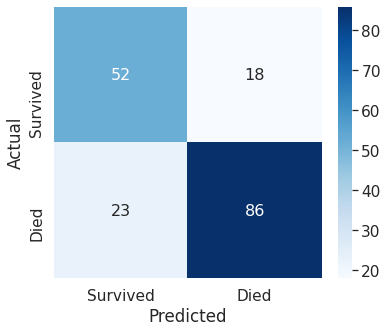

In [ ]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [ ]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=81.56%


# ***Score Model and Evaluate Model with: Logistics Regression (after hyperparamters tuning with GridSearchCV)***

In [30]:
# score model for test set
y_hat= LRGSCVmodel.predict(X_test)

# **Errors** - confusion matrix

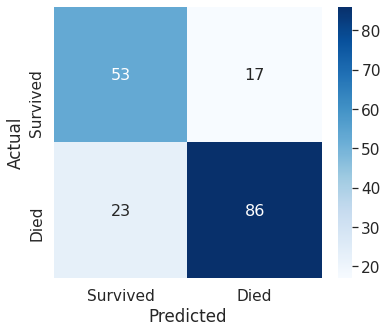

In [31]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [32]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=77.65%


# ***(B) Score Model and Evaluate Model with: KNN***



In [33]:
# score model for test set
y_hat= KNNmodel.predict(X_test)

# **Errors** - confusion matrix

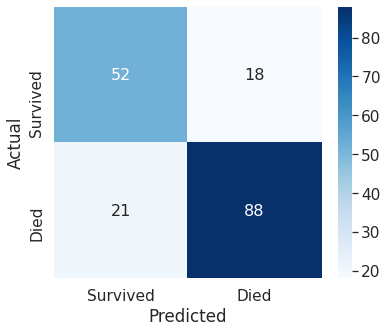

In [34]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [35]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.21%


# ***(C) Score Model and Evaluate Model with: Gaussian Naive Bayes***


In [36]:
# score model for test set
y_hat= Gmodel.predict(X_test)

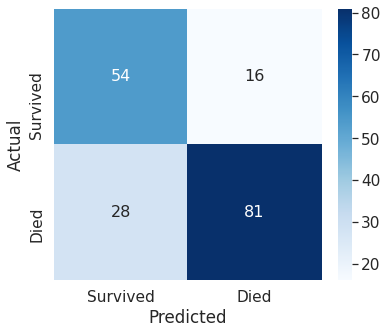

In [37]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [38]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=75.42%


# ***Score Model and Evaluate Model with: Gaussian Naive Bayes (after hyperparameters tuning with GridSearchCV***



In [44]:
# score model for test set
y_hat= GmodelGSCV.predict(X_test)

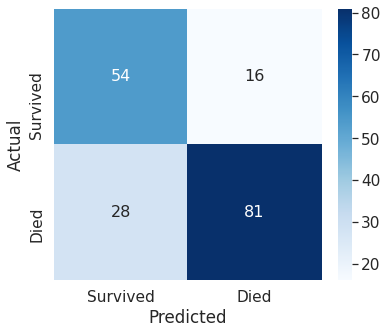

In [45]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [49]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=74.30%


# **# (D)Score Model and Evaluate Model with: Decision Tree Classifier**


In [46]:
# score model for test set
y_hat= DTModel.predict(X_test)

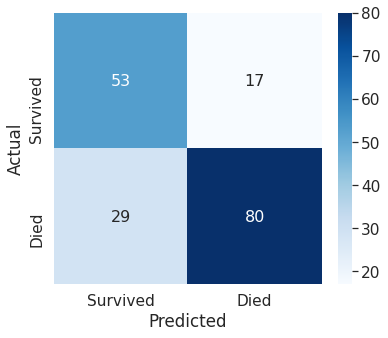

In [47]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [48]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=74.30%


# ***Score Model and Evaluate Model with: SVC***

In [51]:
# score model for test set
y_hat= SVCmodel.predict(X_test)

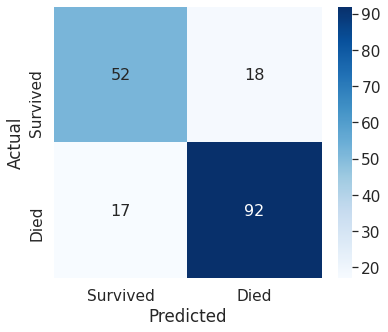

In [52]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [53]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=80.45%


# ***Score Model and Evaluate Model with: Random Forest***

In [54]:
# score model for test set
y_hat= rfModel.predict(X_test)

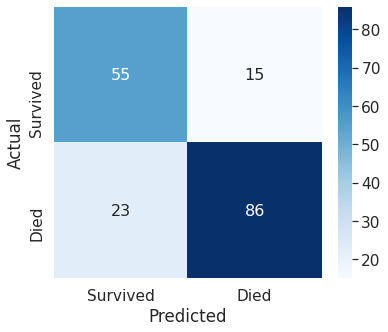

In [55]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [56]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


# ***Score Model and Evaluate Model with:Random Forest (after hyperparameters tuning with RandomSearchCV***

In [32]:
# score model for test set
y_hat= rfModelRSCV.predict(X_test)

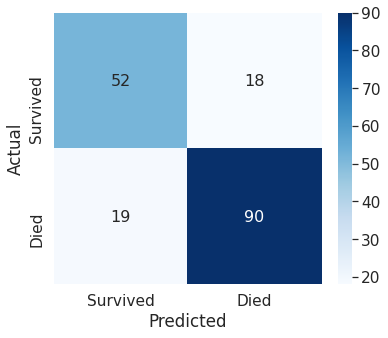

In [33]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [34]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=79.33%


# ***Score Model and Evaluate Model with: Random Forest (after hyperparameters tuning with GridSearchCV***

In [ ]:
# score model for test set
y_hat= rfModelGSCV.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
# evaluate model for test set
class_names=["Survived","Died"]
cm = confusion_matrix(y_test, y_hat, labels=[1,0])
df_cm = pd.DataFrame(cm, columns=class_names, index = class_names)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (6,5))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

In [ ]:
# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

# Submitting to Kaggle

# **Stupid Baseline (Everyone Dies)**
• How well does your system compare to a stupid baseline?


> stupid baseline is 0.62200 (Kaggle Test Score) - 62.2%


> My best Prediction is using Random Forest learning alggoorithm- 0.78229 (Kaggle Test score) - 78.229% 








The stupid baseline is based on the majority of *Survived* status. In which case, we will have a rule which states that everybody died in the Titanic. 

In [ ]:
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = 0
dfout[:5]


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [ ]:
dfout.to_csv("stupidbaseline.csv",index=False)

## Data Preparation for the test.csv

In [ ]:
titanictest.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
titanictestdf = titanictest.drop(["PassengerId","Name","Ticket"],axis=1)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,NaN,Q
1,3,female,47.0,1,0,7.0000,NaN,S


In [ ]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [ ]:
# fill in the missing age
titanictestdf['Age'].fillna(titanic['Age'].mean(), inplace=True)

In [ ]:
# fill in the missing cabins
# We will replace the Cabin value with No if missing and Yes if there is a cabin number
titanictestdf['Cabin'].fillna('No', inplace=True)
titanictestdf['Cabin'].replace(regex=r'^((?!No).)*$',value='Yes',inplace=True)
titanictestdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,34.5,0,0,7.8292,No,Q
1,3,female,47.0,1,0,7.0000,No,S


In [ ]:
# fill in the missing fare with the mean fare
titanictestdf['Fare'].fillna(titanic['Fare'].mean(), inplace=True)

In [ ]:
# List out all variables with nulls/missing values
titanictestdf.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [ ]:
# Encode all the categorical variables
predictdf = pd.get_dummies(titanictestdf,columns=nonnumfeats)
predictdf.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_No,Cabin_Yes,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0,1,1,0,0,1,0
1,3,47.0,1,0,7.0000,1,0,1,0,0,0,1


In [ ]:
Xp = predictdf.values
Xp[:2]

array([[ 3.    , 34.5   ,  0.    ,  0.    ,  7.8292,  0.    ,  1.    ,
         1.    ,  0.    ,  0.    ,  1.    ,  0.    ],
       [ 3.    , 47.    ,  1.    ,  0.    ,  7.    ,  1.    ,  0.    ,
         1.    ,  0.    ,  0.    ,  0.    ,  1.    ]])

## Prediction with Logistics Regression Trained Model

In [ ]:
yp_hat = modelLR.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]
dfout.to_csv("modelLR_lrpredict.csv",index=False)

## Prediction with Logistics Regression Trained Model (after hyperparameters tuning)

In [ ]:
yp_hat = LRGSCVmodel.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]
dfout.to_csv("LRGSCVmodel_lrpredict.csv",index=False)

## Prediction with KNN Trained Model

In [ ]:
yp_hat = KNNmodel.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]
dfout.to_csv("KNNmodel_lrpredict.csv",index=False)

## Prediction with Gaussian Naive Bayes Trained Model

In [ ]:
yp_hat = Gmodel.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("Gmodel_lrpredict.csv",index=False)

## Prediction with Gaussian Naive Bayes Trained Model (after hyperparameters tuning)

In [ ]:
yp_hat = GmodelGSCV.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("GmodelCV_lrpredict.csv",index=False)

## Prediction with Decision Tree Trained Model

In [ ]:
yp_hat = DTModel.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("DTModel_lrpredict.csv",index=False)

## Prediction with Decision Tree Trained Model (After hyperparamters tuning)

In [ ]:
yp_hat = DTModelCV.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("DTModelCV_lrpredict.csv",index=False)

In [ ]:
yp_hat = DTModelCVRand.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("DTModelCVRand_lrpredict.csv",index=False)

## Prediction with SVC Trained Model

In [ ]:
yp_hat = SVCmodel.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("SVCModel_lrpredict.csv",index=False)

## Prediction with Random Forest Trained Model

In [ ]:
yp_hat = rfModel.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("rfModel_lrpredict.csv",index=False)

In [ ]:
yp_hat = rfModelCV.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("rfModelCV_lrpredict.csv",index=False)

## Prediction with Random Forest Trained Model (After hyperparameters tuning with RandomSearchCV)

In [ ]:
yp_hat = rfModelRSCV.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("rfModelRSCV_lrpredict.csv",index=False)

## Prediction with Random Forest Trained Model (After hyperparameters tuning with GridSearchCV)

In [ ]:
yp_hat = rfModelGSCV.predict(Xp)
dfout = pd.DataFrame() 
dfout[["PassengerId"]] = titanictest[["PassengerId"]]
dfout["Survived"] = yp_hat
dfout[:25]

dfout.to_csv("rfModelGSCV_lrpredict.csv",index=False)

# Which features the model considers important? 
- predict using 1 feature at a time and compare which feature gives a higher score

- it seems like all the features are equally important since each feature gives the same accuracy scoer

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Cabin_No        uint8
Cabin_Yes       uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8



In [41]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Age'].values

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [43]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Sex_female'].values

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [48]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Sex_male'].values

#print(titanicdf['Sex_male'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [49]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Cabin_No'].values

#print(titanicdf['Sex_male'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [58]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Cabin_Yes'].values

#print(X)
#print(titanicdf['Age'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [59]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Fare'].values

#print(X)
#print(titanicdf['Age'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [60]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Parch'].values

#print(X)
#print(titanicdf['Age'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [61]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['SibSp'].values

#print(X)
#print(titanicdf['Age'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [62]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Pclass'].values

#print(X)
#print(titanicdf['Age'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [63]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Embarked_C'].values

#print(X)
#print(titanicdf['Age'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [64]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Embarked_S'].values

#print(X)
#print(titanicdf['Age'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


In [65]:
from sklearn.model_selection import train_test_split
y = titanicdf["Survived"].values
X = titanicdf['Embarked_Q'].values

#print(X)
#print(titanicdf['Age'])

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.20, random_state=3)

# score model for test set
y_hat= rfModel.predict(X_test)

# Accuracy score for test set
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_hat)
print("Accuracy score for the test set={:.2f}%".format(score*100))

Accuracy score for the test set=78.77%


# Conclusions


Random Forest learning model gives the best prediction (best Kaggle score 78.229%) using the following parameters

RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=5, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=911,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# **References:**

1.  https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/
2.   https://towardsdatascience.com/optimizing-hyperparameters-in-random-forest-classification-ec7741f9d3f6


Used these references to help to understand and determine which parameters to tune and how to tune








## Tutorials
- [Titanic Data Science Solutions Python Notebook](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
- [An Interactive Data Science Tutorial](https://www.kaggle.com/helgejo/an-interactive-data-science-tutorial)